Enter CONSUMER KEY: zumHggorhcsaUjFtZo4cfjf3y
Enter CONSUMER SECRET: fwtNObwo2SYGgEubW5uV5IWA2nbPhYzTAA4lnNehfP0uKIbE7c
Enter ACCESS KEY: 897488518074605568-OShUHypCKadYJaP1AHaw3JGojUI7AvU
Enter ACCESS SECRET: SCPDyAmNbArGYyUU4LJYtAv7kfC5cOsfDnv2vIv84UeOb
Enter the username of the tweet you want ot extract:india
Number of tweets extracted: 199.

5 recent tweets:

RT @NinjaCryptoCoin: @ThetaToken Keep an eye on these content delivery platform gurus 🎬 at @ThetaToken as they mos def have a sexy roadmap!…

@officialmcafee @JSaneOfficial John, my idol, pls follow me.

RT @Claudiu86bogdan: Vote and retweet ! Let's help our beloved project to be added on another exchange . @Digibyte @Dgb #Digibytecoin https…

RT @domain: https://t.co/9FA84WrSel just enjoy discount with the reffer code! https://t.co/X7nnC6qt8g

get on the train of MTC right now. the next bitcoin in the field of Telemedical https://t.co/Qah3m0T4Ml

https://t.co/aZ6ObWYBdl

I voted #DIGIBYTE for #ProjectBillboardLA! Vote now @ h

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @NinjaCryptoCoin: @ThetaToken Keep an eye o...,140,1005589782112718849,2018-06-09 23:17:41,Twitter for Android,0,2,1
1,"@officialmcafee @JSaneOfficial John, my idol, ...",60,1002325794884972544,2018-05-31 23:07:46,Twitter for Android,1,0,0
2,RT @Claudiu86bogdan: Vote and retweet ! Let's ...,140,1002242428387000320,2018-05-31 17:36:30,Twitter for Android,0,8,1
3,RT @domain: https://t.co/9FA84WrSel just enjoy...,101,1001884476958359552,2018-05-30 17:54:08,Twitter for Android,0,1,1
4,get on the train of MTC right now. the next bi...,103,1001840430646870016,2018-05-30 14:59:06,Twitter for Android,0,0,1
5,https://t.co/aZ6ObWYBdl,23,1000478788549931009,2018-05-26 20:48:25,Twitter for Android,0,0,0
6,I voted #DIGIBYTE for #ProjectBillboardLA! Vot...,77,999794109622579200,2018-05-24 23:27:45,Twitter for Android,8,4,0
7,Go to buy $elf ASAP! it is going to the moon,44,991950693551423488,2018-05-03 08:00:49,Twitter for Android,0,0,0
8,"just buy Aelf, DGB and Theta",28,989831811831287809,2018-04-27 11:41:08,Twitter for Android,0,0,0
9,in Shenzhen https://t.co/2I6Vr8EaxZ,35,987008544238022656,2018-04-19 16:42:29,Twitter for Android,1,0,0


Percentage of positive tweets: 44.221105527638194%
Percentage of neutral tweets: 50.25125628140704%
Percentage de negative tweets: 5.527638190954774%


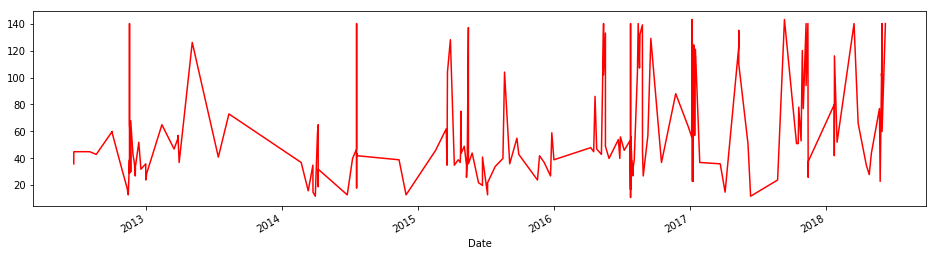

In [4]:
#!/usr/bin/python3

#to consume Twitter's API
import tweepy
#to handle data
import pandas as pd
#for number computing
import numpy as np
#import request
#analysis
from textblob import TextBlob
#regular expression
import re

#for plotting and visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

#our access keys and consumer keys:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = input("Enter CONSUMER KEY: ") 
CONSUMER_SECRET = input("Enter CONSUMER SECRET: ") 

app_only_auth: True

# Access:
ACCESS_TOKEN  = input("Enter ACCESS KEY: ") 
ACCESS_SECRET = input("Enter ACCESS SECRET: ")




#(editing)-------------credentials variables by use-----------


#API's setup:
def twitter_setup():
    '''
    Utility function to setup the Twitter's API
    with our access keys provided.
    '''
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

# We create an extractor object:
extractor = twitter_setup()

tweet_name=input("Enter the username of the tweet you want ot extract:")
# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name=tweet_name, count=1000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:10]:
    print(tweet.text)
    print()

#we create a pandas dataframe as follows(systematic manner)
data=pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

#we display the first 10 elements of the data frame
#display(data.head(20))

'''
# We print info from the first tweet:
print("-----------------------------------------------------------")
print(tweets[0].id)
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)
#print(dir(tweets[0]))
'''



# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])


# Display of first 20 elements from dataframe:
#display(data.head(20))



# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("---------------The tweet with more likes is---------------: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("---------------The tweet with more retweets is---------------: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))
#----------TIME ANALYSIS(graph plotting)------------------

# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');



#-----SENTIMENTAL ANALYSIS---------------
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1#postive
    elif analysis.sentiment.polarity == 0:
        return 0#netural
    else:
        return -1#negative

# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))



